In [ ]:
pip install floodlight

In [2]:
import floodlight

In [3]:
from floodlight.io.datasets import EIGDDataset

# get the default segment from the EIGD dataset
dataset = EIGDDataset()
home, _, _ = dataset.get()
pitch = dataset.get_pitch()

<Axes: title={'center': 'Home Team Trajectories'}>

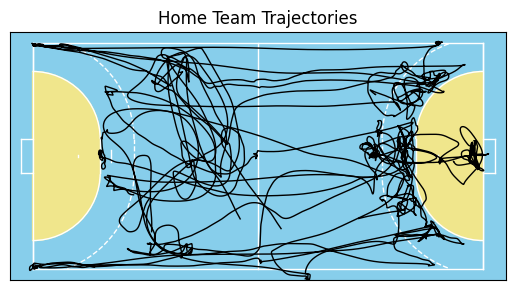

In [14]:
import matplotlib.pyplot as plt

# create a matplotlib plot
fig, ax = plt.subplots()
ax.set_title('Home Team Trajectories')

# plot the pitch
pitch.plot(ax=ax)

# plot the home team trajectories for the first 5000 frames in black
home.plot((1, 5000), plot_type='trajectories', color='black', ax=ax)

<Axes: title={'center': 'Home Team Trajectories'}>

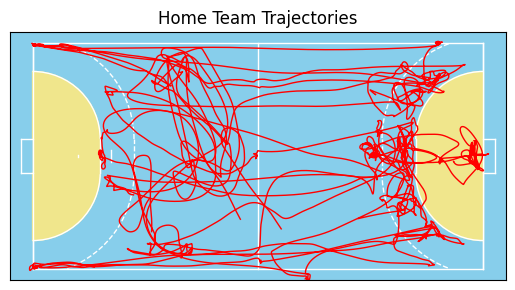

In [15]:
from floodlight.transforms.filter import butterworth_lowpass

# create a matplotlib plot
fig, ax = plt.subplots()
ax.set_title('Home Team Trajectories')

# plot the pitch
pitch.plot(ax=ax)

# filter the data and plot again in red
home = butterworth_lowpass(home)
home.plot((1, 5000), plot_type='trajectories', color='red', ax=ax)

In [16]:
home

XY(xy=array([[30.416     , 15.463     , 32.848     , ...,         nan,
                nan,         nan],
       [30.416     , 15.463     , 32.848     , ...,         nan,
                nan,         nan],
       [30.416     , 15.463     , 32.848     , ...,         nan,
                nan,         nan],
       ...,
       [33.37052653, 14.39360579, 34.22247934, ...,         nan,
                nan,         nan],
       [33.37624329, 14.37676141, 34.20835425, ...,         nan,
                nan,         nan],
       [33.38129505, 14.36170284, 34.1960485 , ...,         nan,
                nan,         nan]]), framerate=30, direction=None)

In [17]:
pitch

Pitch(xlim=(0, 40), ylim=(0, 20), unit='m', boundaries='fixed', length=40, width=20, sport='handball')

In [18]:
import numpy as np

from floodlight.models.kinematics import DistanceModel, VelocityModel
from floodlight.models.kinetics import MetabolicPowerModel
from floodlight.models.geometry import CentroidModel

# dictionary for computed metrics
metrics = {"Name": [f"Player {n}" for n in range(home.N)]}

In [19]:
# create - fit - query
model1 = DistanceModel()
model1.fit(home)
distances = model1.cumulative_distance_covered()
metrics["Total Dist. [m]"] = distances[-1]

In [20]:
metrics

{'Name': ['Player 0',
  'Player 1',
  'Player 2',
  'Player 3',
  'Player 4',
  'Player 5',
  'Player 6',
  'Player 7',
  'Player 8',
  'Player 9',
  'Player 10',
  'Player 11',
  'Player 12',
  'Player 13',
  'Player 14',
  'Player 15'],
 'Total Dist. [m]': array([393.86037511, 371.09885625, 320.73222907, 350.20728291,
        182.30682916, 371.31427526, 210.78476429, 216.40073075,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ])}

In [21]:
model2 = VelocityModel()
model2.fit(home)
speeds = model2.velocity()
metrics["Top Speed [m/s]"] = np.nanmax(speeds, axis=0)

C:\Users\e99bo\AppData\Local\Temp\ipykernel_21788\1568711217.py:4: RuntimeWarning: All-NaN axis encountered
  metrics["Top Speed [m/s]"] = np.nanmax(speeds, axis=0)


In [22]:
model3 = MetabolicPowerModel()
model3.fit(home)
metabolic_power = model3.cumulative_metabolic_power()
metrics["Metabolic Work"] = metabolic_power[-1]

model4 = CentroidModel()
model4.fit(home)
centroid_distance = model4.centroid_distance(home)
metrics["Avg. Centroid Dist. [m]"] = np.nanmean(centroid_distance, axis=0)

C:\Users\e99bo\AppData\Local\Temp\ipykernel_21788\3522448797.py:9: RuntimeWarning: Mean of empty slice
  metrics["Avg. Centroid Dist. [m]"] = np.nanmean(centroid_distance, axis=0)


In [23]:
import pandas as pd

# create and show DataFrame
metrics = pd.DataFrame(metrics)
metrics = metrics.round(3)
print(metrics.head(16).to_string())

         Name  Total Dist. [m]  Top Speed [m/s]  Metabolic Work  Avg. Centroid Dist. [m]
0    Player 0          393.860            6.927        1642.784                    5.805
1    Player 1          371.099            5.948        1500.297                    3.965
2    Player 2          320.732            6.406        1403.297                    9.409
3    Player 3          350.207            7.031        1470.553                    9.390
4    Player 4          182.307            6.395         750.813                    4.920
5    Player 5          371.314            5.599        1570.586                    3.412
6    Player 6          210.785            3.210         722.766                   10.623
7    Player 7          216.401            6.078         944.793                    4.584
8    Player 8            0.000              NaN           0.000                      NaN
9    Player 9            0.000              NaN           0.000                      NaN
10  Player 10        